# Preprocessing

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

In [ ]:
# Load the dataset
salary = pd.read_csv('Data_Science_Salaries.csv')

In [ ]:
# Remove duplicate rows to avoid over-representation of certain data points
salary = salary.drop_duplicates()

In [ ]:
# Calculate interquartile range to identify outliers in salary
Q1 = salary['salary_in_usd'].quantile(0.25)
Q3 = salary['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify and count outliers
outliers = salary[(salary['salary_in_usd'] < lower_bound) | (salary['salary_in_usd'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 166


In [ ]:
# Normalize continuous variables to a 0-1 range
scaler = MinMaxScaler()
salary[['salary_in_usd', 'remote_ratio']] = scaler.fit_transform(salary[['salary_in_usd', 'remote_ratio']])

In [ ]:
# Save the preprocessed dataset
salary.to_csv('Preprocessed_Data.csv', index=False)

# Feature Engineering

In [ ]:
# Reload the preprocessed dataset for feature engineering
salary = pd.read_csv('Preprocessed_Data.csv')

In [ ]:
# Create a new feature combining experience level and job title
if 'experience_level' in salary.columns and 'job_title' in salary.columns:
    salary['experience_job_combination'] = salary['experience_level'] + "_" + salary['job_title']
else:
    raise KeyError("'experience_level' or 'job_title' is missing in the dataset.")

In [ ]:
# One-hot encode categorical variables and drop the first category to avoid multicollinearity
categorical_columns = ['experience_level', 'job_title', 'experience_job_combination']
salary = pd.get_dummies(salary, columns=categorical_columns, drop_first=True)

In [ ]:
# Save the feature-engineered dataset
salary.to_csv('Feature_Engineered_Data.csv', index=False)
print("Feature engineering completed and saved to 'Feature_Engineered_Data.csv'")

Feature engineering completed and saved to 'Feature_Engineered_Data.csv'


# Summary Statistics and Boxplot

In [ ]:
# Generate and display summary statistics for the dataset
summary_stats = salary.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
          work_year        salary  salary_in_usd  remote_ratio  \
count  9127.000000  9.127000e+03    9127.000000   9127.000000   
mean   2023.144735  1.715814e+05       0.167837      0.363098   
std       0.779968  4.514935e+05       0.093522      0.473861   
min    2020.000000  1.400000e+04       0.000000      0.000000   
25%    2023.000000  9.545150e+04       0.101911      0.000000   
50%    2023.000000  1.400000e+05       0.157197      0.000000   
75%    2024.000000  1.885000e+05       0.217707      1.000000   
max    2024.000000  3.040000e+07       1.000000      1.000000   

       experience_level_EX  experience_level_MI  experience_level_SE  \
count          9127.000000          9127.000000          9127.000000   
mean              0.038786             0.270187             0.593185   
std               0.193095             0.444081             0.491267   
min               0.000000             0.000000             0.000000   
25%               0.000000       

In [ ]:
# Save summary statistics to a CSV file
summary_stats.to_csv("Summary_Statistics.csv", index=True)

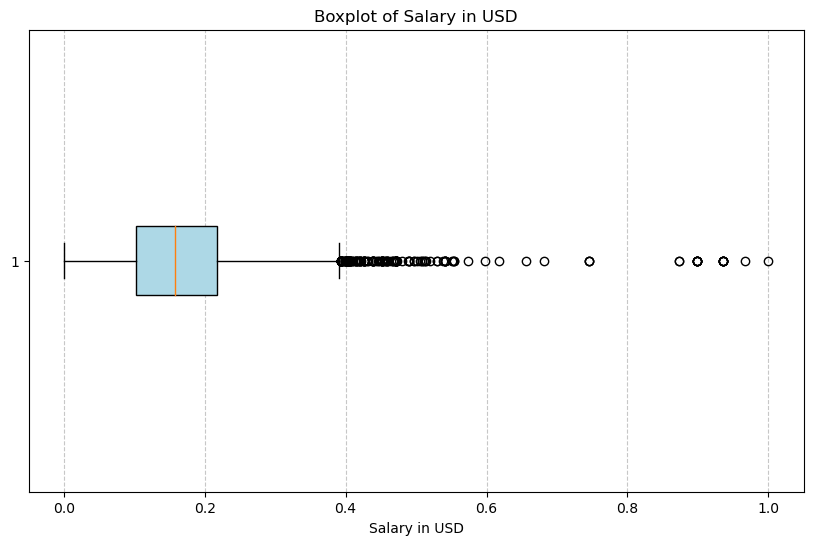

In [ ]:
# Create a boxplot to visualize the salary distribution
plt.figure(figsize=(10, 6))
plt.boxplot(salary['salary_in_usd'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Boxplot of Salary in USD")
plt.xlabel("Salary in USD")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# PCA

In [ ]:
# Reload the feature-engineered dataset
salary = pd.read_csv('Feature_Engineered_Data.csv')

In [ ]:
# Select numeric features and exclude the target variable
X = salary.select_dtypes(include=['float64', 'int64']).drop(columns=['salary_in_usd'], errors='ignore')

In [ ]:
# Standardize the numeric features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

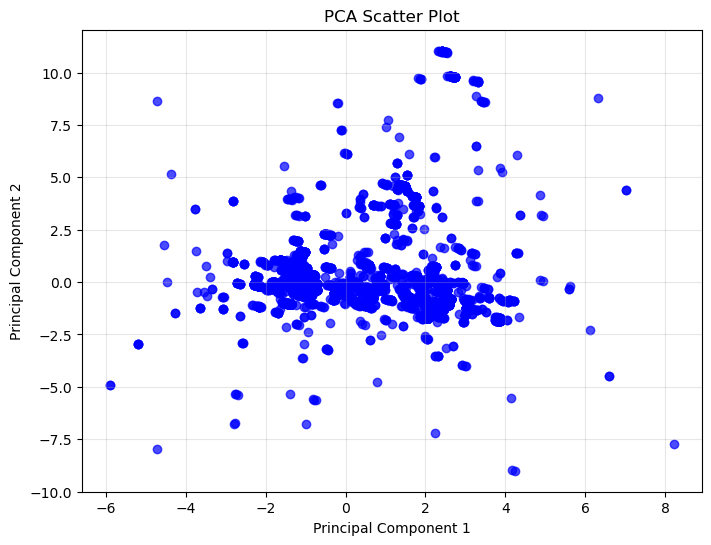

In [ ]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c='blue')
plt.title("PCA Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Display explained variance ratio for the components
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

Explained Variance Ratio: [0.00587471 0.00495098]
